NetworkXNoPath: Node device1 not reachable from input1

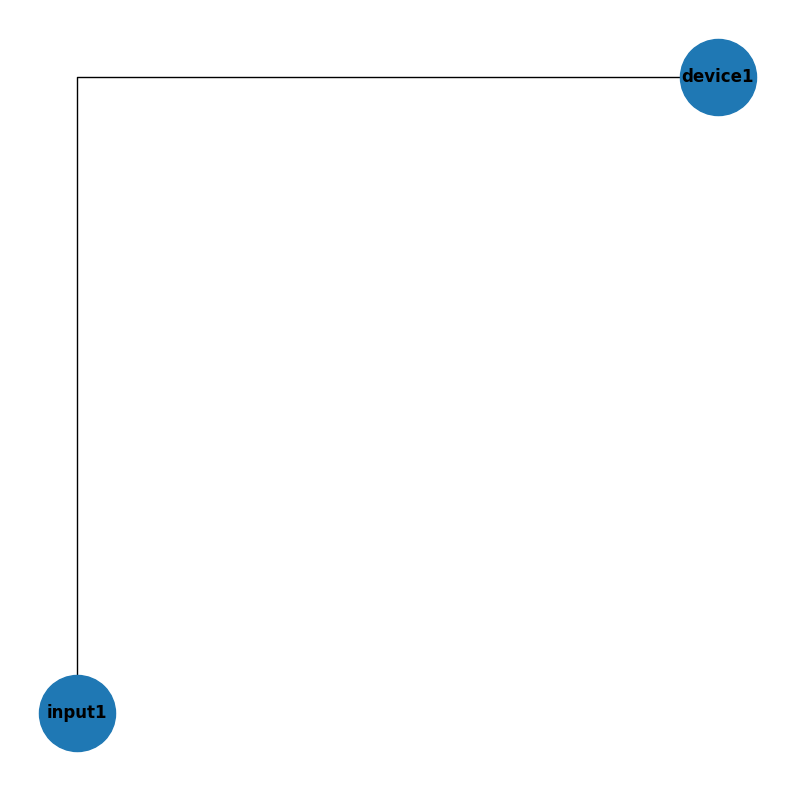

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
import pickle
import json

# 创建一个空的图
G = nx.MultiDiGraph()

# 添加节点并指定位置和尺寸
nodes = {
    'input1': {'pos': (1, 5), 'size': 100, 'type': 'input'},
    # 'input2': {'pos': (1, 3), 'size': 120, 'type': 'input'},
    'device1': {'pos': (3, 4), 'size': 150, 'type': 'device'},
    # 'device2': {'pos': (4, 5), 'size': 130, 'type': 'device'},
    # 'output1': {'pos': (6, 2), 'size': 110, 'type': 'output'},
    # 'output2': {'pos': (6, 7), 'size': 140, 'type': 'output'}
}

# 定义所需的像素尺寸
pixel_width = 1200
pixel_height = 1200

# 计算所需的英寸尺寸
dpi = 120  # 屏幕 DPI
inch_width = pixel_width / dpi
inch_height = pixel_height / dpi

plt.figure(figsize=(inch_width, inch_height))

ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()

for node, data in nodes.items():
    G.add_node(node, pos=data['pos'], size=data['size'], type=data['type'])

# edges = [('input1', 'device1'), ('input2', 'device2'), ('device1', 'output1'), ('device2', 'output2')]
edges = [('input1', 'device1')]
pos = {key: val['pos'] for key, val in nodes.items()}

for edge in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[edge], connectionstyle='Angle', arrows=True)

nx.draw(G, pos, with_labels=True, node_size=3000, font_weight='bold', font_size=12, arrowsize=20)

# 从 plt.gcf 中获取类型为 PathCollection 的对象
current_fig = plt.gcf()

path = nx.astar_path(G, "input1", "device1",
                     heuristic=lambda u, v: ((G.nodes[u]["pos"][0] - G.nodes[v]["pos"][0]) ** 2 + (
                                 G.nodes[u]["pos"][1] - G.nodes[v]["pos"][1]) ** 2) ** 0.5)

turning_points = [G.nodes[node]["pos"] for node in path]
print("turning_points: ", turning_points)

# path_collections = current_fig.findobj(match=lambda x: isinstance(x, PathCollection))
# for path_collection in path_collections:
#     # 从 PathCollection 中获取数据
#     print("path_collection: ", path_collection)
# 
#     paths = path_collection.get_paths()
#     offsets = path_collection.get_offsets()
#     sizes = path_collection.get_sizes()
# 
#     # print("path_collection.get_paths()[0].vertices: ", path_collection.get_paths()[0].vertices)
#     # print("path_collection.get_paths()[0].codes: ", path_collection.get_paths()[0].codes)
#     print(paths[0].vertices)
#     print(paths[0].codes)
# 
#     # print("paths: ", paths)
#     # print("offsets: ", offsets)
#     # print("sizes: ", sizes)
#     # with open("path_collection.pkl", "wb") as f:
#     #     pickle.dump({"paths": paths, "offsets": offsets, "sizes": sizes}, f)

# # 查找 patches 对象
# patches = current_fig.findobj(lambda x: hasattr(x, "get_edgecolor") and hasattr(x, "get_facecolor"))
# # 将 patches 数据序列化成 JSON
# serialized_patches = []
# for patch in patches:
#     serialized_patch = {
#         "type": str(type(patch)),
#         "edgecolor": patch.get_edgecolor(),
#         "facecolor": patch.get_facecolor()
#     }
#     serialized_patches.append(serialized_patch)

# 将 JSON 数据写入文件
# with open('line.json', 'w') as file:
#     json.dump(serialized_patches, file)

plt.draw()

In [46]:
import pickle

# 从磁盘读取数据
with open("path_collection.pkl", "rb") as f:
    data = pickle.load(f)

# 获取数据
paths = data["paths"]
offsets = data["offsets"]
sizes = data["sizes"]
paths_data = paths[0]
print("paths_data: ", paths_data)
print("offsets: ", offsets)
print("sizes: ", sizes)

# 构造新的 networkx 图
G = nx.MultiDiGraph()

# 添加节点
for node in nodes.keys():
    G.add_node(node, pos=nodes[node]["pos"], size=nodes[node]["size"], type=nodes[node]["type"])

# 添加边
for i in range(len(paths_data)):
    nx.draw_networkx_edges(G, paths_data[i][0], paths_data[i][1], weight=1)

# 绘制图
nx.draw(G, pos, with_labels=True, node_size=3000, font_weight='bold', font_size=12, arrowsize=20)

paths_data:  Path(array([[ 0.        , -0.5       ],
       [ 0.13260155, -0.5       ],
       [ 0.25978994, -0.44731685],
       [ 0.35355339, -0.35355339],
       [ 0.44731685, -0.25978994],
       [ 0.5       , -0.13260155],
       [ 0.5       ,  0.        ],
       [ 0.5       ,  0.13260155],
       [ 0.44731685,  0.25978994],
       [ 0.35355339,  0.35355339],
       [ 0.25978994,  0.44731685],
       [ 0.13260155,  0.5       ],
       [ 0.        ,  0.5       ],
       [-0.13260155,  0.5       ],
       [-0.25978994,  0.44731685],
       [-0.35355339,  0.35355339],
       [-0.44731685,  0.25978994],
       [-0.5       ,  0.13260155],
       [-0.5       ,  0.        ],
       [-0.5       , -0.13260155],
       [-0.44731685, -0.25978994],
       [-0.35355339, -0.35355339],
       [-0.25978994, -0.44731685],
       [-0.13260155, -0.5       ],
       [ 0.        , -0.5       ],
       [ 0.        , -0.5       ]]), array([ 1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,

TypeError: 'Path' object is not subscriptable

((0.0, -0.5), (0.13260155, -0.5), (0.25978994, -0.44731685), (0.35355339, -0.35355339), (0.44731685, -0.25978994), (0.5, -0.13260155), (0.5, 0.0), (0.5, 0.13260155), (0.44731685, 0.25978994), (0.35355339, 0.35355339), (0.25978994, 0.44731685), (0.13260155, 0.5), (0.0, 0.5), (-0.13260155, 0.5), (-0.25978994, 0.44731685), (-0.35355339, 0.35355339), (-0.44731685, 0.25978994), (-0.5, 0.13260155), (-0.5, 0.0), (-0.5, -0.13260155), (-0.44731685, -0.25978994), (-0.35355339, -0.35355339), (-0.25978994, -0.44731685), (-0.13260155, -0.5), (0.0, -0.5), (0.0, -0.5))


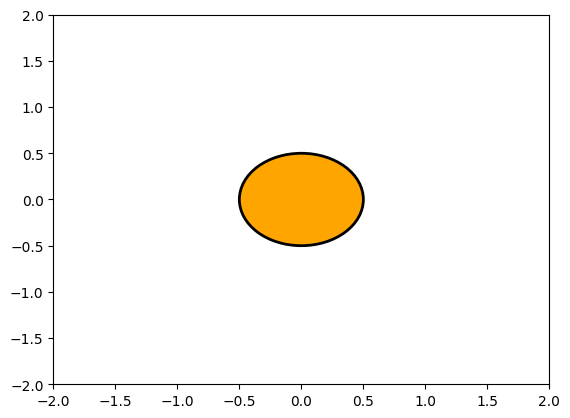

In [68]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

origin_verts = [[0., -0.5],
                [0.13260155, -0.5],
                [0.25978994, -0.44731685],
                [0.35355339, -0.35355339],
                [0.44731685, -0.25978994],
                [0.5, -0.13260155],
                [0.5, 0.],
                [0.5, 0.13260155],
                [0.44731685, 0.25978994],
                [0.35355339, 0.35355339],
                [0.25978994, 0.44731685],
                [0.13260155, 0.5],
                [0., 0.5],
                [-0.13260155, 0.5],
                [-0.25978994, 0.44731685],
                [-0.35355339, 0.35355339],
                [-0.44731685, 0.25978994],
                [-0.5, 0.13260155],
                [-0.5, 0.],
                [-0.5, -0.13260155],
                [-0.44731685, -0.25978994],
                [-0.35355339, -0.35355339],
                [-0.25978994, -0.44731685],
                [-0.13260155, -0.5],
                [0., -0.5],
                [0., -0.5]]
origin_codes = [1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                4, 4, 4, 4, 4, 4, 4, 4, 79]

# data = [[0., -0.5], [0.13260155, -0.5]]
# data = tuple(map(lambda x: (float(x[0]), float(x[1])), data))
# print(data)

v = tuple(map(lambda x: (float(x[0]), float(x[1])), origin_verts))
print(v)

path = Path(v, origin_codes)

# 图形顶点的坐标
verts = [
    (0., 0.),  # 左下角的点
    (0., 1.),  # 左上角的点
    (1., 1.),  # 右上角的点
    (1., 0.),  # 右下角的点
    (0., 0.),  # 忽略
]

# 坐标对应的路径代码
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

# path2 = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

Figure(640x480)
Rectangle(xy=(0, 0), width=1, height=1, angle=0)
Spine
Spine
Spine
Spine
Rectangle(xy=(0, 0), width=1, height=1, angle=0)
Figure(640x480)


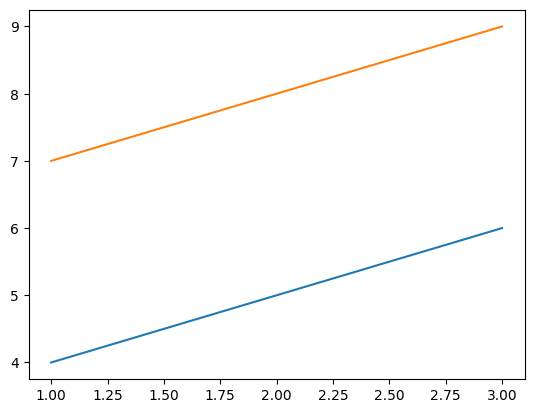

In [80]:
import matplotlib.pyplot as plt

from matplotlib.patches import Patch

# 绘制一些 patches

plt.plot([1, 2, 3], [4, 5, 6])
plt.plot([1, 2, 3], [7, 8, 9])

# 获取所有子对象

# 获取当前图表对象
current_fig = plt.gcf()
# 查找 patches 对象
patches = current_fig.findobj(lambda x: hasattr(x, "get_edgecolor") and hasattr(x, "get_facecolor"))

# 将 patches 对象保存到文件
with open('patches_data.pkl', 'wb') as file:
    pickle.dump(patches, file)

patch:  Rectangle(xy=(0, 0), width=1, height=1, angle=0)


AttributeError: 'tuple' object has no attribute 'add_artist'

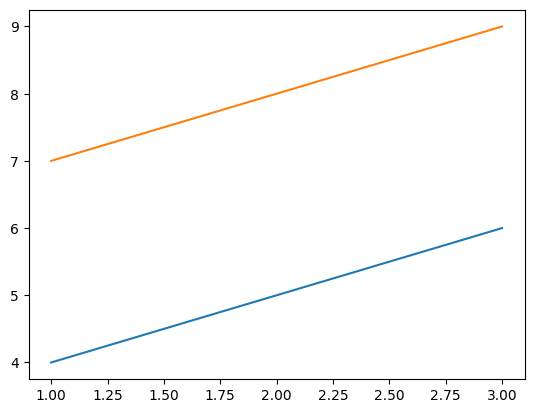

In [86]:
import matplotlib.pyplot as plt
import pickle

# 从磁盘加载序列化的文件
with open('patches_data.pkl', 'rb') as file:
    patches = pickle.load(file)

# 创建新的图表对象
# ax = plt.subplots()

# 将加载的 patches 对象添加到新的图表对象
for patch in patches:
    print("patch: ", patch)
    ax.add_artist(patch)

# 显示图表
plt.show()

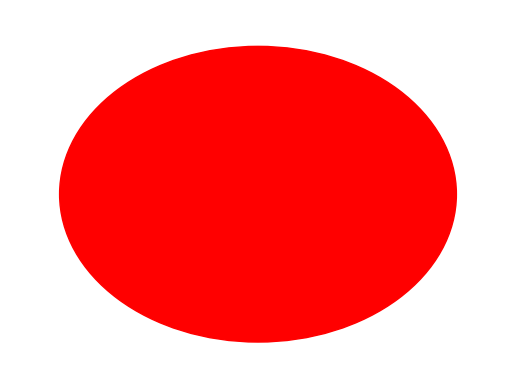

In [92]:
import matplotlib.pyplot as plt
import json

# 创建图表并添加图形对象
fig, ax = plt.subplots()
circle = plt.Circle((0.5, 0.5), 0.4, color='r')
ax.add_artist(circle)

plt.axis('off')

# 获取当前图表对象
current_fig = plt.gcf()
# 查找 patches 对象
patches = current_fig.findobj(lambda x: hasattr(x, "get_edgecolor") and hasattr(x, "get_facecolor"))
# 将 patches 数据序列化成 JSON
serialized_patches = []
for patch in patches:
    serialized_patch = {
        "type": str(type(patch)),
        "edgecolor": patch.get_edgecolor(),
        "facecolor": patch.get_facecolor()
    }
    serialized_patches.append(serialized_patch)

# 将 JSON 数据写入文件
with open('patches_data.json', 'w') as file:
    json.dump(serialized_patches, file)

{'type': "<class 'matplotlib.patches.Rectangle'>", 'edgecolor': [1.0, 1.0, 1.0, 1.0], 'facecolor': [1.0, 1.0, 1.0, 1.0]}


SyntaxError: invalid syntax (<string>, line 1)

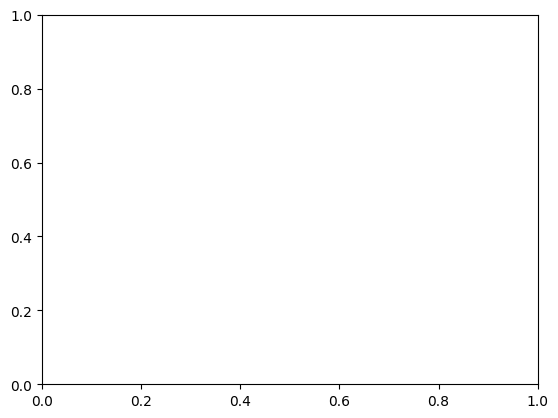

In [95]:
import matplotlib.pyplot as plt
import json

# 从 JSON 文件加载数据
with open('patches_data.json', 'r') as file:
    serialized_patches = json.load(file)

# 创建新的图表对象
fig, ax = plt.subplots()

# 从加载的 JSON 数据中构造 patches 对象
for serialized_patch in serialized_patches:
    print(serialized_patch)
    patch_type = eval(serialized_patch["type"])  # 将字符串类型转换为实际类型
    patch = patch_type()
    patch.set_edgecolor(serialized_patch["edgecolor"])
    patch.set_facecolor(serialized_patch["facecolor"])
    ax.add_artist(patch)

# 显示图表
plt.show()